# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Importing Dataset

In [2]:
data = pd.read_csv('Agricultural_Dataset.csv')

## Exploring Data

In [3]:
data.head()

,District,year,area,avg_rainfall,max_temperature,min_temperature,aus,aman,boro,wheat,...,Noncalcareous Brown Floodplain Soil,Shallow Red-Brown Terrace Soil,Deep Red-Brown Terrace Soil,Brown Mottled Terrace Soil,Shallow Grey Terrace Soil,Deep Grey Terrace Soil,Grey Valley Soil,Brown Hill Soil,Grey Piedmont Soil,soil moisture
0,dhaka,2008,NaN,2385,34.2,12.5,804,9691,233939,1129,...,0,0,0,0,0,0,0,0,0,124237
1,gazipur,2008,NaN,2197,30.2,19.5,4328,93956,208434,479,...,13,29623,46500,2414,8375,4660,14637,0,0,154669
2,narsingdi,2008,NaN,2197,34.2,12.5,484,93958,207669,2073,...,0,881,9800,601,0,140,687,0,0,94963
3,narayangonj,2008,NaN,2197,34.2,12.2,1617,14485,129390,4585,...,0,2800,4840,30,213,0,728,0,0,59782
4,tangail,2008,NaN,1856,34.1,10.2,447,170918,672851,17477,...,566,14764,47378,2423,1971,6390,20642,0,0,306539


In [4]:
data.shape

(70, 44)

In [5]:
data.describe()

,year,area,avg_rainfall,max_temperature,min_temperature,aus,aman,boro,wheat,potato,...,Noncalcareous Brown Floodplain Soil,Shallow Red-Brown Terrace Soil,Deep Red-Brown Terrace Soil,Brown Mottled Terrace Soil,Shallow Grey Terrace Soil,Deep Grey Terrace Soil,Grey Valley Soil,Brown Hill Soil,Grey Piedmont Soil,soil moisture
count,70.00000,35.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2012.50000,7475.228571,1837.800000,30.629857,13.721286,18252.314286,189617.114286,4.692248e+05,4171.171429,38164.014286,...,2527.100000,8650.957143,18737.271429,1169.857143,1737.214286,3346.600000,6075.514286,58.871429,2128.257143,193793.814286
std,2.89302,11307.554466,302.520024,3.167797,3.347841,29706.253768,193552.028696,3.608393e+05,5210.864389,22832.560637,...,5914.907549,10531.687458,18811.216611,1195.144455,2881.325565,4540.865883,7556.329798,146.556506,5348.138397,112060.050833
min,2008.00000,21.000000,1181.000000,22.200000,10.100000,49.000000,9691.000000,9.558200e+04,125.000000,2711.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59606.000000
25%,2010.00000,290.500000,1634.750000,29.480000,11.732500,634.000000,28040.750000,2.056815e+05,487.500000,18305.500000,...,0.000000,39.250000,1088.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94966.750000
50%,2012.50000,1085.000000,1848.500000,30.700000,12.600000,1518.500000,108442.500000,2.328285e+05,2334.500000,40718.000000,...,17.500000,2569.000000,9023.000000,716.000000,249.500000,142.000000,789.000000,0.000000,0.000000,154704.500000
75%,2015.00000,18910.500000,2115.250000,32.350000,14.500000,33841.250000,261408.750000,7.004412e+05,4846.750000,50869.000000,...,522.000000,14063.000000,40005.000000,2402.250000,1909.750000,6299.250000,11650.000000,0.000000,0.000000,306445.500000
max,2017.00000,39131.000000,2385.000000,35.600000,21.600000,108383.000000,647789.000000,1.425741e+06,17477.000000,100547.000000,...,20826.000000,32923.000000,50661.000000,3080.000000,9873.000000,16808.000000,20834.000000,493.000000,18396.000000,391055.000000


## Data Preprocessing

In [6]:
data.isnull().sum()

District                                    0
year                                        0
area                                       35
avg_rainfall                                0
max_temperature                             0
min_temperature                             0
aus                                         0
aman                                        0
boro                                        0
wheat                                       0
potato                                      0
jute                                        0
humidity                                    0
storm                                       0
urea                                        0
tsp                                         0
mp                                          0
DAP                                         0
inundationland_Highland                     0
inundationland_mediumhighland               0
inundationland_lowland                      0
inundationland_mediumlowland      

In [7]:
data.duplicated().sum()

0

In [8]:
data.dropna(inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 35 to 69
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   District                                 35 non-null     object 
 1   year                                     35 non-null     int64  
 2   area                                     35 non-null     float64
 3   avg_rainfall                             35 non-null     int64  
 4   max_temperature                          35 non-null     float64
 5   min_temperature                          35 non-null     float64
 6   aus                                      35 non-null     int64  
 7   aman                                     35 non-null     int64  
 8   boro                                     35 non-null     int64  
 9   wheat                                    35 non-null     int64  
 10  potato                                   35 non-null    

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'avg_rainfall'}>,
        <Axes: title={'center': 'max_temperature'}>,
        <Axes: title={'center': 'min_temperature'}>,
        <Axes: title={'center': 'aus'}>],
       [<Axes: title={'center': 'aman'}>,
        <Axes: title={'center': 'boro'}>,
        <Axes: title={'center': 'wheat'}>,
        <Axes: title={'center': 'potato'}>,
        <Axes: title={'center': 'jute'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'urea'}>,
        <Axes: title={'center': 'tsp'}>, <Axes: title={'center': 'mp'}>,
        <Axes: title={'center': 'DAP'}>,
        <Axes: title={'center': 'inundationland_Highland'}>,
        <Axes: title={'center': 'inundationland_mediumhighland'}>],
       [<Axes: title={'center': 'inundationland_lowland'}>,
        <Axes: title={'center': 'inundationland_mediumlowland'}>,
        <Axes: title={'center': 'inundationland

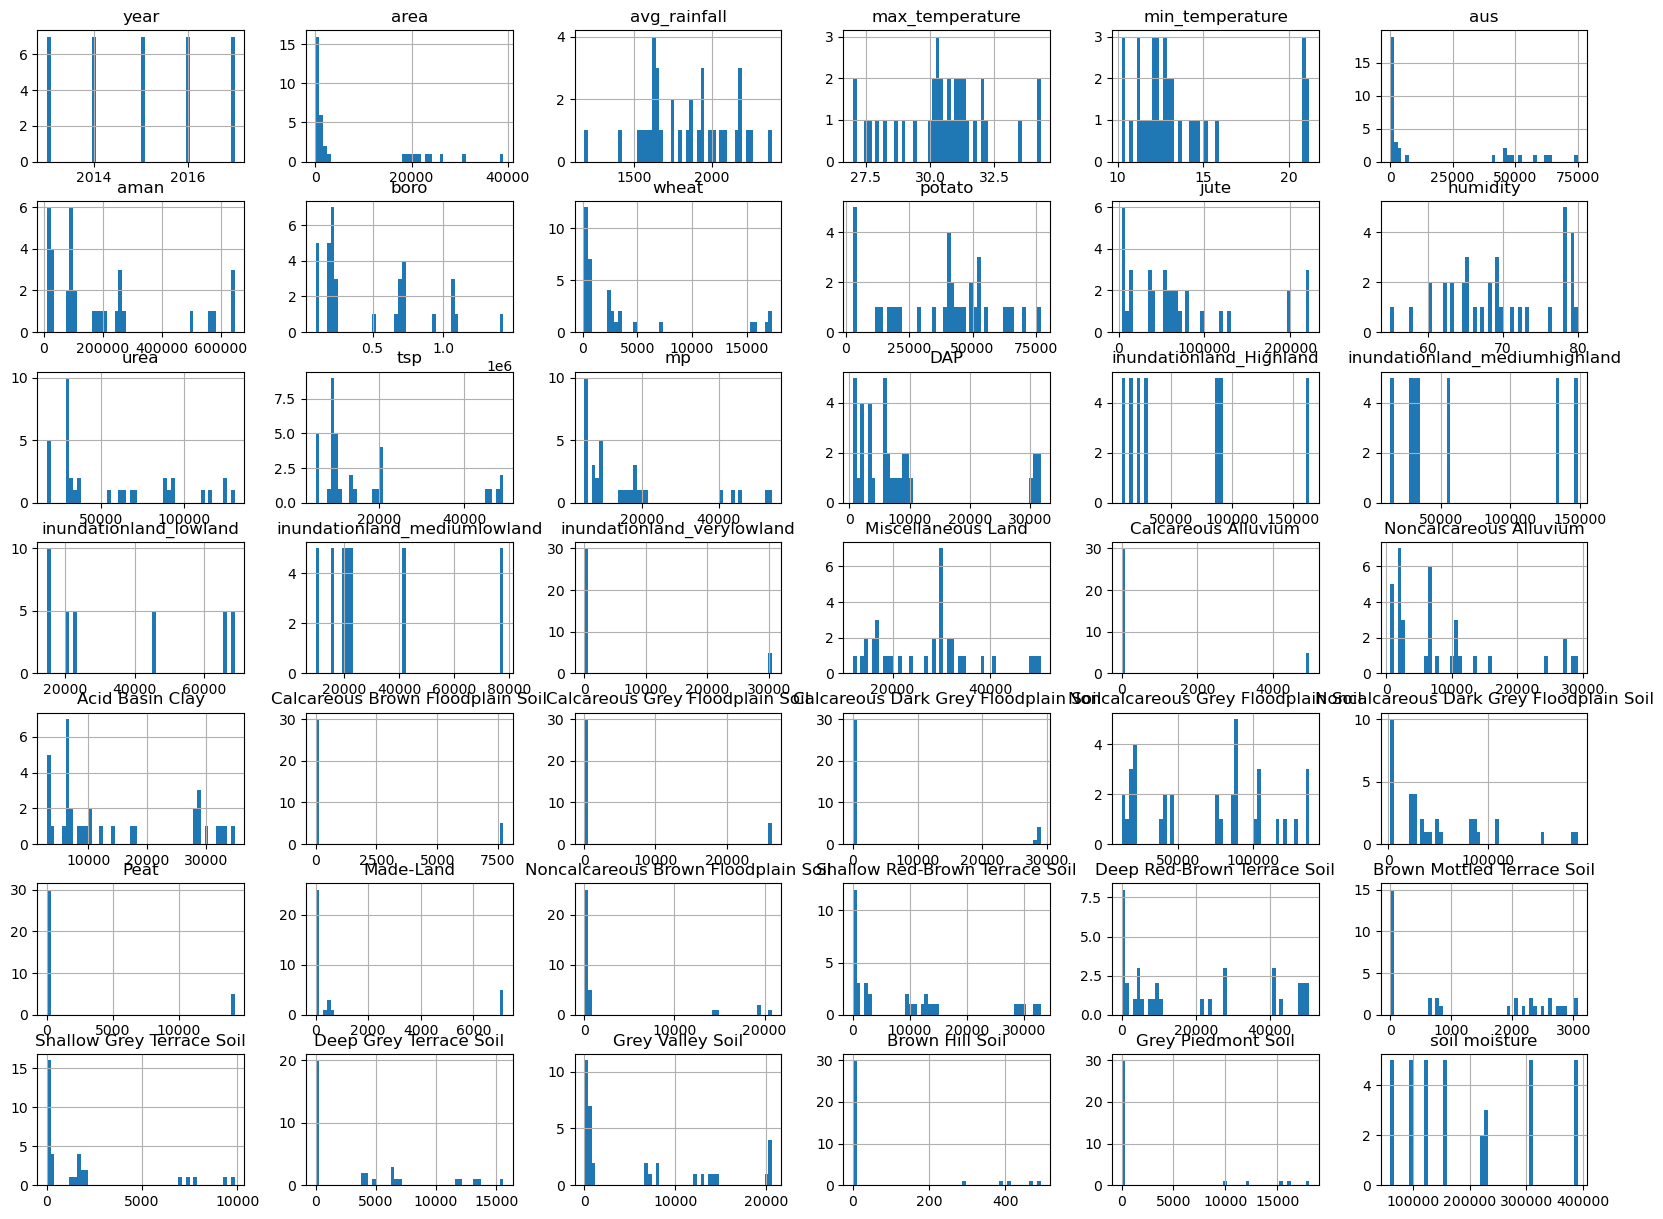

In [10]:
data.hist(bins=50, figsize=(20,15))

## Exploratory Data Analysis (EDA)

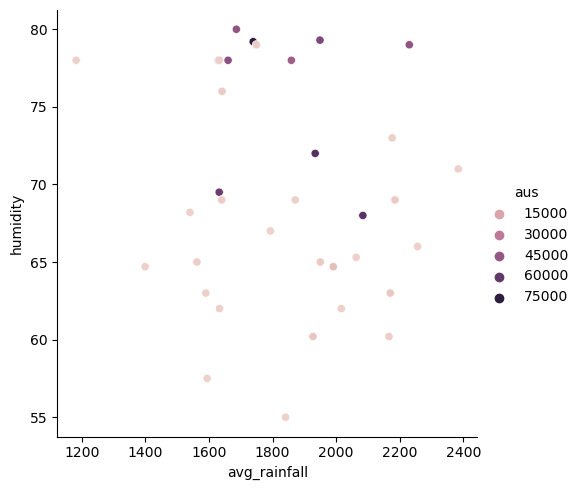

In [11]:
sns.relplot(x='avg_rainfall',y='humidity',data=data,kind='scatter',hue='aus',height=5)
plt.show()

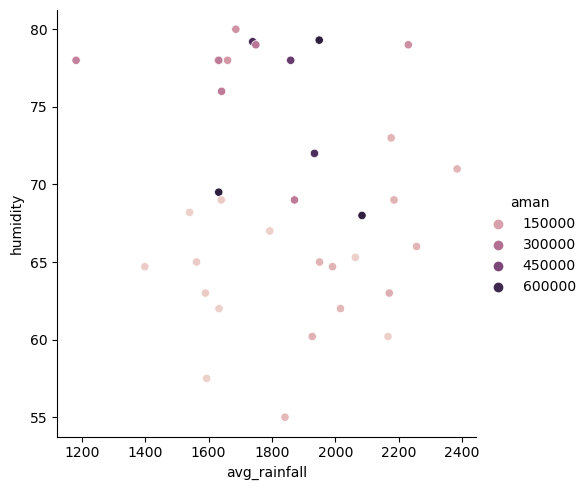

In [12]:
sns.relplot(x='avg_rainfall',y='humidity',data=data,kind='scatter',hue='aman',height=5)
plt.show()

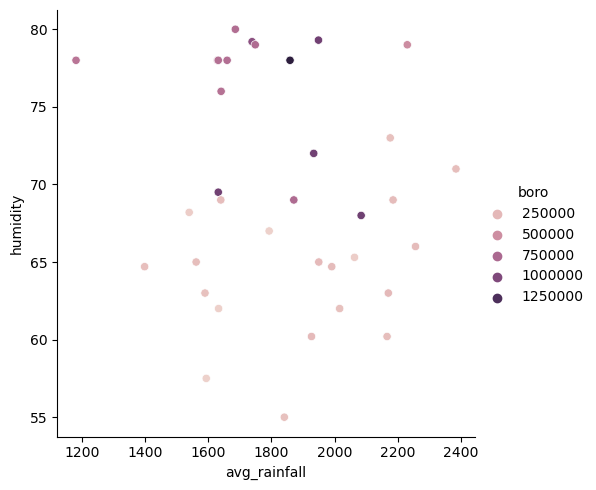

In [13]:
sns.relplot(x='avg_rainfall',y='humidity',data=data,kind='scatter',hue='boro',height=5)
plt.show()

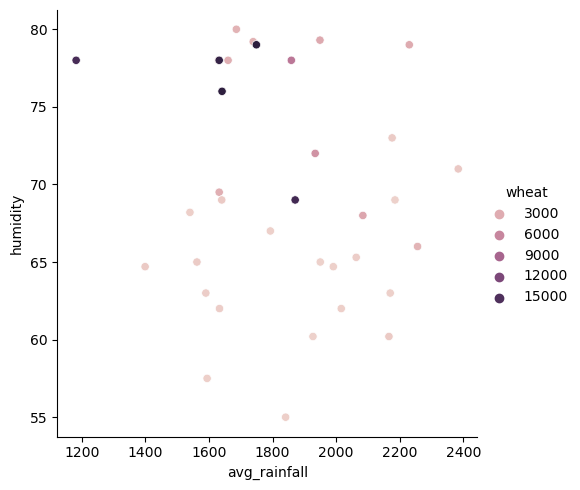

In [14]:
sns.relplot(x='avg_rainfall',y='humidity',data=data,kind='scatter',hue='wheat',height=5)
plt.show()

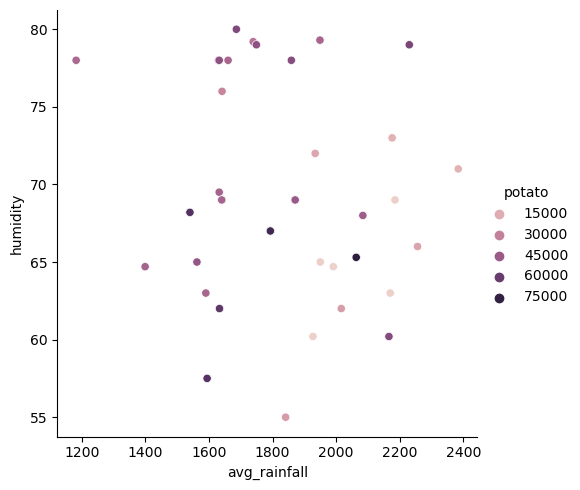

In [15]:
sns.relplot(x='avg_rainfall',y='humidity',data=data,kind='scatter',hue='potato',height=5)
plt.show()

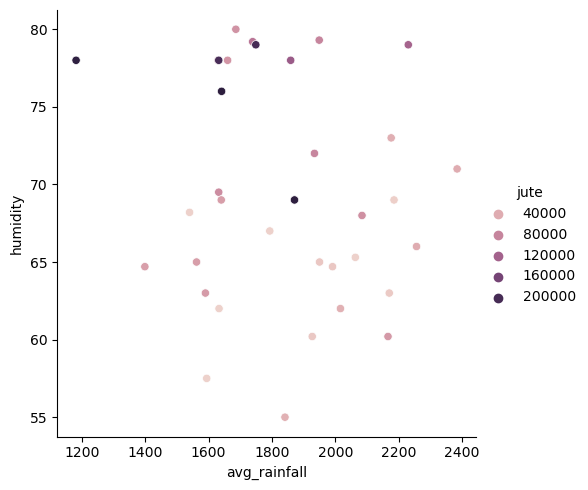

In [16]:
sns.relplot(x='avg_rainfall',y='humidity',data=data,kind='scatter',hue='jute',height=5)
plt.show()

### Boxplot Outliers

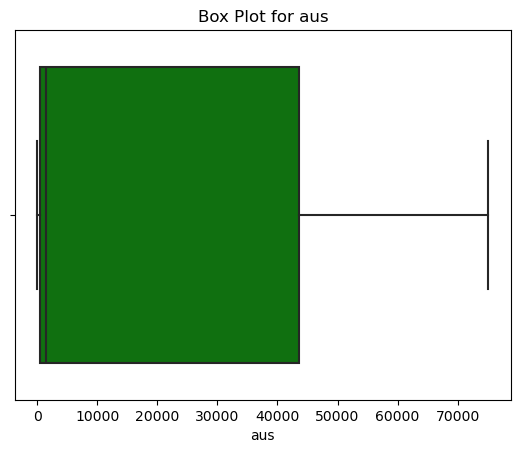

In [17]:
#box plot to check if there is outlier for average rainfall
sns.boxplot(x=data['aus'], color='green')
plt.title('Box Plot for aus')
plt.show()

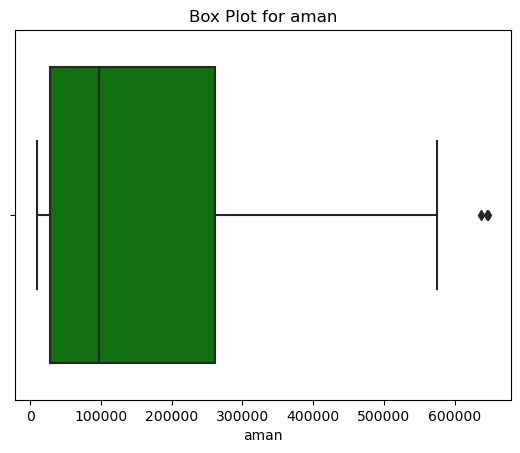

In [18]:
#box plot to check if there is outlier for average rainfall
sns.boxplot(x=data['aman'], color='green')
plt.title('Box Plot for aman')
plt.show()

<Axes: xlabel='aman_capped'>

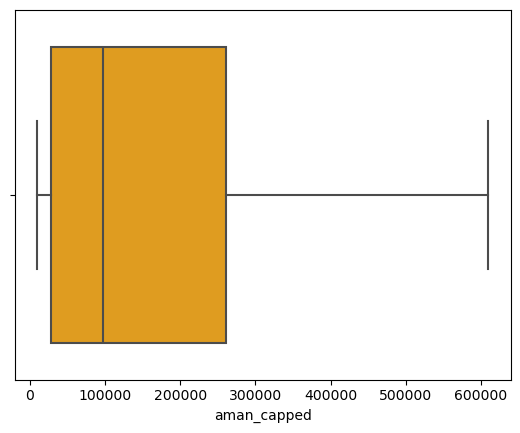

In [19]:
q1 = data['aman'].quantile(0.25)
q3 = data['aman'].quantile(0.75)

#iqr it finds out the inter quartile range
iqr = q3 - q1
lower_bound = q1 -1.5*iqr
upper_bound = q3 + 1.5*iqr

#Define the lower and upper bound
Lower_bound = q1-1.5*iqr
Upper_bound = q3+1.5*iqr

#Cap the outliers
data['aman_capped'] = np.where(data['aman'] > upper_bound, upper_bound, np.where(data['aman'] < lower_bound, lower_bound, data['aman']))
sns.boxplot(x=data['aman_capped'], color='orange')

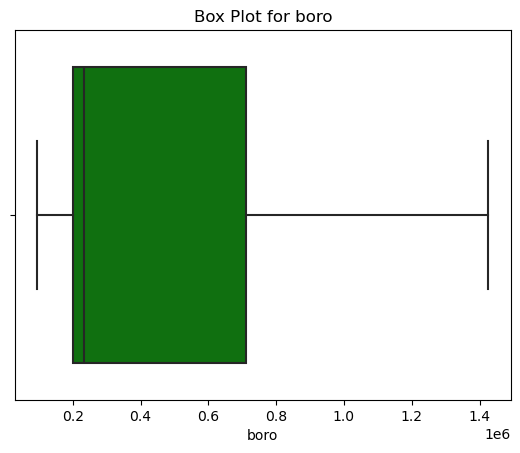

In [20]:
#box plot to check if there is outlier for average rainfall
sns.boxplot(x=data['boro'], color='green')
plt.title('Box Plot for boro')
plt.show()

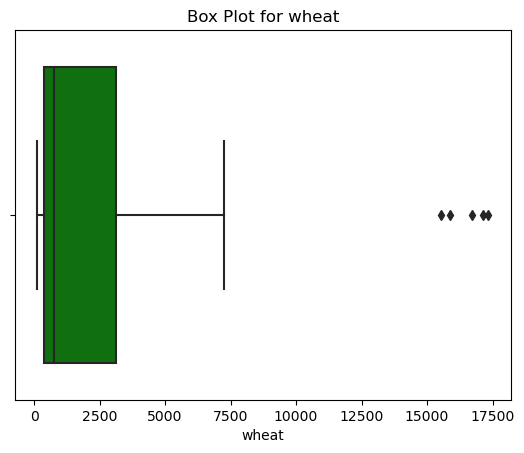

In [21]:
#box plot to check if there is outlier for average rainfall
sns.boxplot(x=data['wheat'], color='green')
plt.title('Box Plot for wheat')
plt.show()

<Axes: xlabel='wheat_capped'>

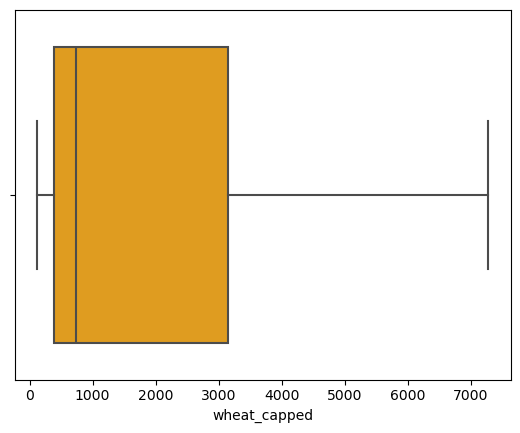

In [22]:
q1 = data['wheat'].quantile(0.25)
q3 = data['wheat'].quantile(0.75)

#iqr it finds out the inter quartile range
iqr = q3 - q1
lower_bound = q1 -1.5*iqr
upper_bound = q3 + 1.5*iqr

#Define the lower and upper bound
Lower_bound = q1-1.5*iqr
Upper_bound = q3+1.5*iqr

#Cap the outliers
data['wheat_capped'] = np.where(data['wheat'] > upper_bound, upper_bound, np.where(data['wheat'] < lower_bound, lower_bound, data['wheat']))
sns.boxplot(x=data['wheat_capped'], color='orange')

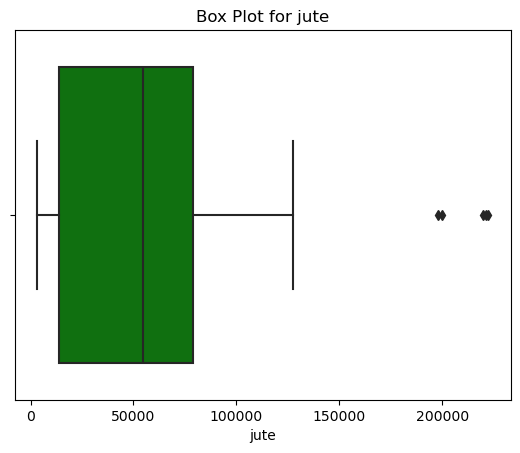

In [23]:
#checking for outliers
sns.boxplot(x=data['jute'], color='green')
plt.title('Box Plot for jute')
plt.show()

<Axes: xlabel='jute_capped'>

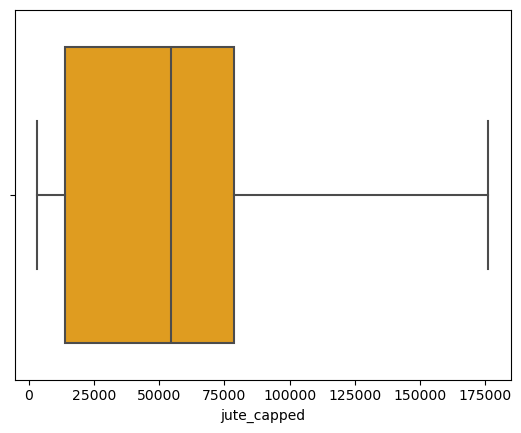

In [24]:
q1 = data['jute'].quantile(0.25)
q3 = data['jute'].quantile(0.75)

#iqr it finds out the inter quartile range
iqr = q3 - q1
lower_bound = q1 -1.5*iqr
upper_bound = q3 + 1.5*iqr

#Define the lower and upper bound
Lower_bound = q1-1.5*iqr
Upper_bound = q3+1.5*iqr

#Cap the outliers
data['jute_capped'] = np.where(data['jute'] > upper_bound, upper_bound, np.where(data['jute'] < lower_bound, lower_bound, data['jute']))
sns.boxplot(x=data['jute_capped'], color='orange')

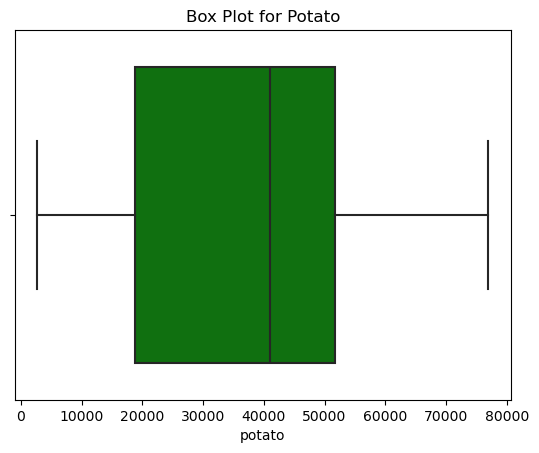

In [25]:
#checking for outliers
sns.boxplot(x=data['potato'], color='green')
plt.title('Box Plot for Potato')
plt.show()

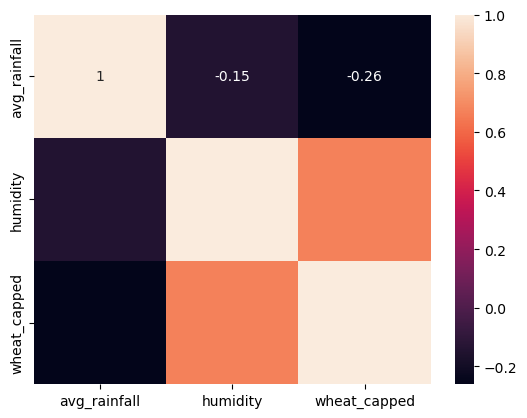

In [26]:
#Scatter plot to visualize the relationship
data1 = data[['avg_rainfall','humidity','wheat_capped']]

#Correlation matrix
Correlation_matrix = data1.corr()
sns.heatmap(Correlation_matrix, annot = True)
plt.show()

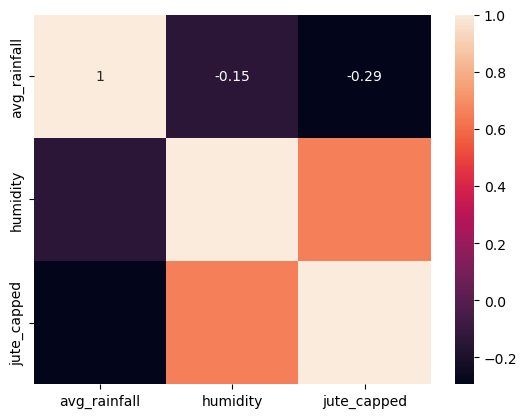

In [27]:
#Scatter plot to visualize the relationship
data1 = data[['avg_rainfall','humidity','jute_capped']]

#Correlation matrix
Correlation_matrix = data1.corr()
sns.heatmap(Correlation_matrix, annot = True)
plt.show()

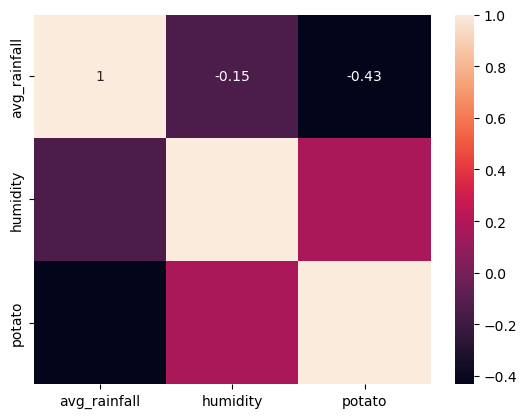

In [28]:
#Scatter plot to visualize the relationship
data1 = data[['avg_rainfall','humidity','potato']]

#Correlation matrix
Correlation_matrix = data1.corr()
sns.heatmap(Correlation_matrix, annot = True)
plt.show()

## Train-Test Split

In [29]:
# Define features and targets
features = ['avg_rainfall', 'humidity', 'max_temperature', 'min_temperature', 'soil moisture']
targets = ['aus', 'aman_capped', 'boro', 'wheat_capped', 'jute_capped', 'potato']

# Train-test split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_set[features]  # feature columns
y_train = train_set[targets]  # target columns
X_test = test_set[features]  # feature columns
y_test = test_set[targets]  # target columns
print(len(X_train), len(y_train), len(X_test), len(y_test))

28 28 7 7


## Min-Max Scaler

In [30]:
 from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming X_train and X_test are your feature matrices
# Initialize the scalers
 scaler_standard = StandardScaler()
 scaler_minmax = MinMaxScaler()

# Fit and transform the training data
 X_train_standardized = scaler_standard.fit_transform(X_train)
 X_train_normalized = scaler_minmax.fit_transform(X_train)

# Transform the testing data using the same scaler
 X_test_standardized = scaler_standard.transform(X_test)
 X_test_normalized = scaler_minmax.transform(X_test)

## Model Comparison & Selection

### Linear Regression Model

In [31]:
def train_evaluate_model(X_train, X_test, y_train, y_test, target):
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    print(f'Target: {target}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')
    
    return model

# Dictionary to store models for each target
models = {}

# Train and evaluate models for each target crop
for target in targets:
    print(f'Training model for {target} yield prediction:')
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    model = train_evaluate_model(X_train, X_test, y_train_target, y_test_target, target)
    models[target] = model

Training model for aus yield prediction:
Target: aus
Mean Squared Error: 192913903.747191
R^2 Score: 0.7334768954852364

Training model for aman_capped yield prediction:
Target: aman_capped
Mean Squared Error: 2811602698.917056
R^2 Score: 0.9526012096569408

Training model for boro yield prediction:
Target: boro
Mean Squared Error: 13184261639.528442
R^2 Score: 0.9162636623079705

Training model for wheat_capped yield prediction:
Target: wheat_capped
Mean Squared Error: 1458581.765076609
R^2 Score: 0.2075268681220972

Training model for jute_capped yield prediction:
Target: jute_capped
Mean Squared Error: 1086075428.4148846
R^2 Score: -0.38259072857371845

Training model for potato yield prediction:
Target: potato
Mean Squared Error: 554544371.6105651
R^2 Score: -0.22458306958705987



In [32]:
sns.set(style="whitegrid")
def plot_actual_vs_predicted(y_test, y_pred, target, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {target} using {model_name}')
    plt.show()

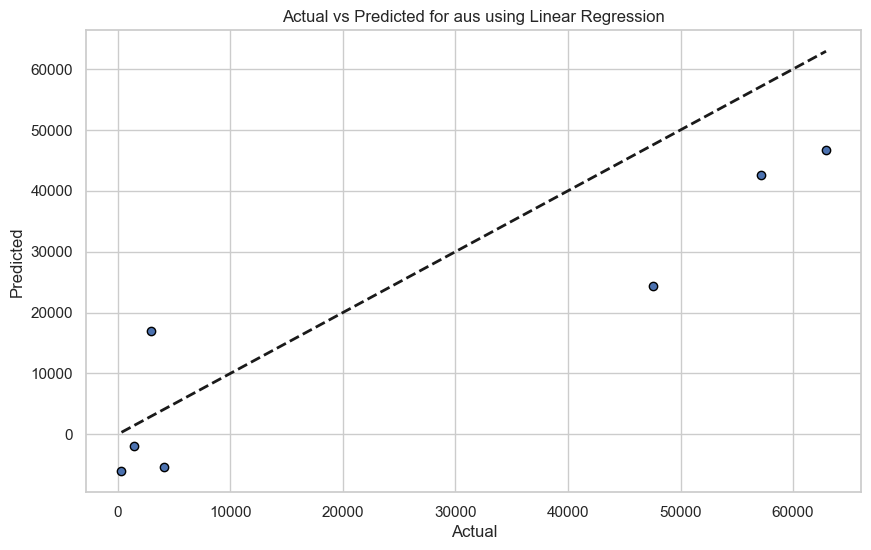

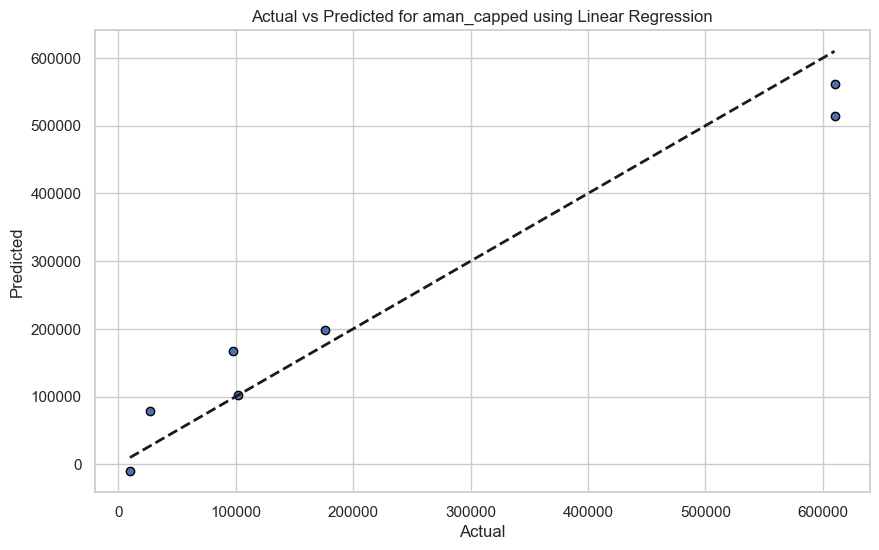

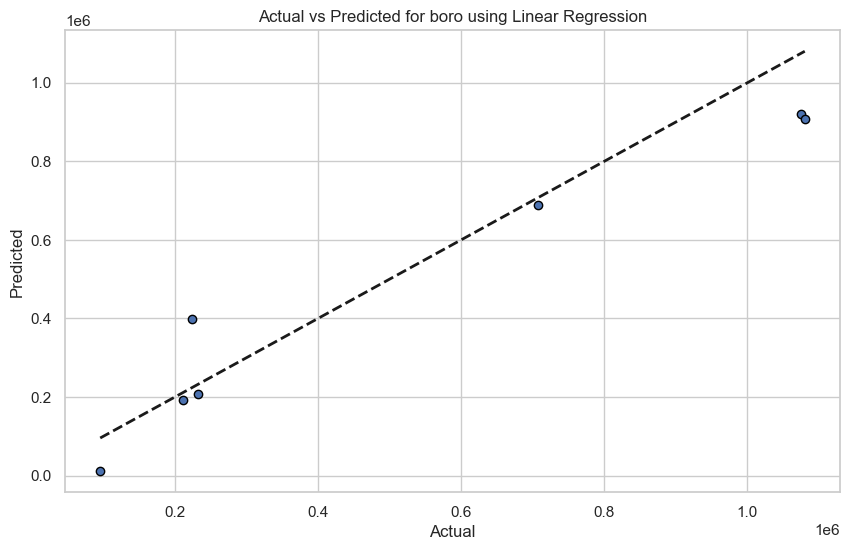

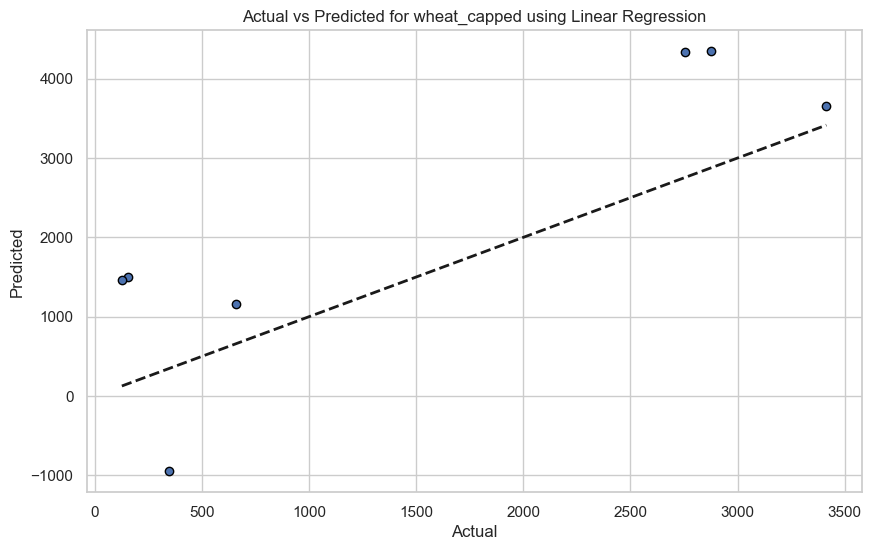

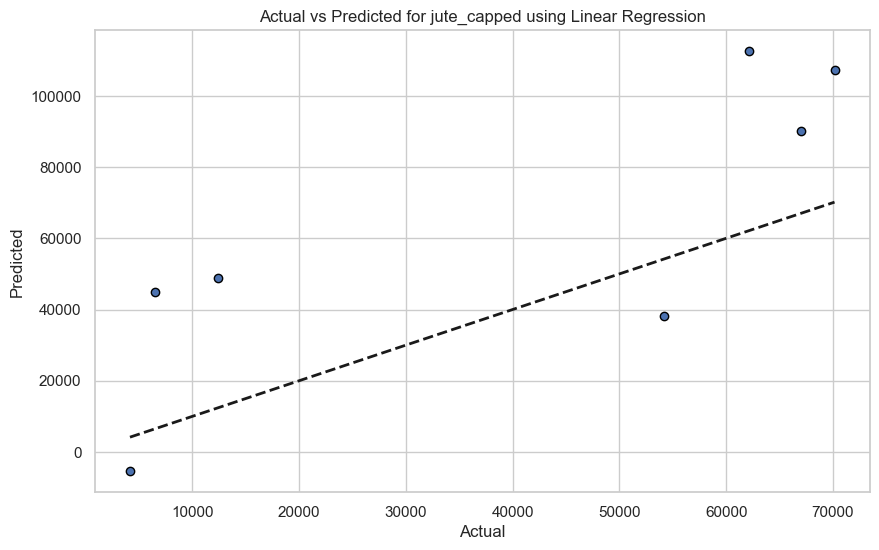

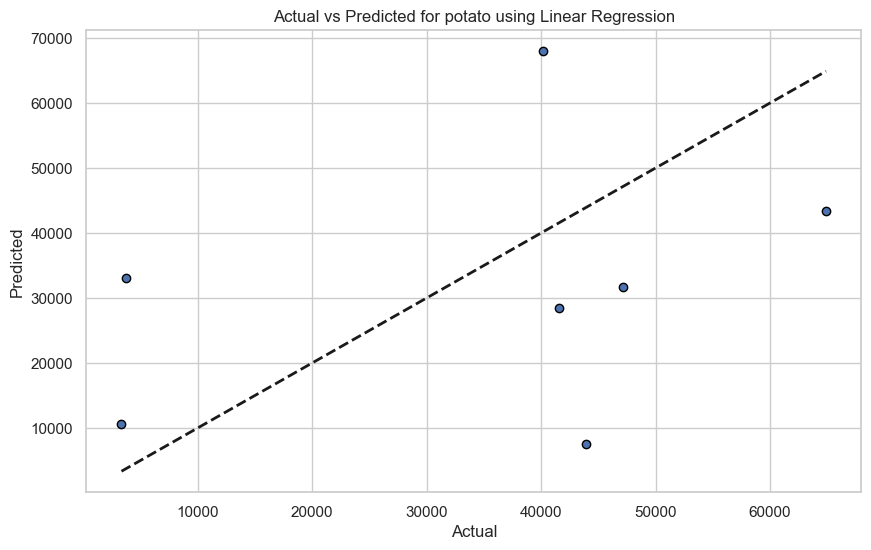

In [33]:
# Plotting actual vs predicted for Linear Regression models
for target in targets:
    model = models[target]
    y_pred = model.predict(X_test)
    plot_actual_vs_predicted(y_test[target], y_pred, target, 'Linear Regression')


In [34]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


### Decision Tree Regression Model

In [70]:
def train_evaluate_decision_tree_model(X_train, X_test, y_train, y_test, target):
    # Train a Decision Tree Regression model
    model = DecisionTreeRegressor(random_state=1234)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Target: {target}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')
    
    return model

# Dictionary to store Decision Tree models for each target
decision_tree_models = {}

# Train and evaluate Decision Tree models for each target crop
for target in targets:
    print(f'Training Decision Tree model for {target} yield prediction:')
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    model = train_evaluate_decision_tree_model(X_train, X_test, y_train_target, y_test_target, target)
    decision_tree_models[target] = model

Training Decision Tree model for aus yield prediction:
Target: aus
Mean Squared Error: 25989057.0
R^2 Score: 0.9640944275114126

Training Decision Tree model for aman_capped yield prediction:
Target: aman_capped
Mean Squared Error: 1682215686.517857
R^2 Score: 0.9716407340668094

Training Decision Tree model for boro yield prediction:
Target: boro
Mean Squared Error: 3066326100.714286
R^2 Score: 0.9805250438087878

Training Decision Tree model for wheat_capped yield prediction:
Target: wheat_capped
Mean Squared Error: 150370.42857142858
R^2 Score: 0.9183011008878452

Training Decision Tree model for jute_capped yield prediction:
Target: jute_capped
Mean Squared Error: 37609064.571428575
R^2 Score: 0.9521230822221272

Training Decision Tree model for potato yield prediction:
Target: potato
Mean Squared Error: 376705490.5714286
R^2 Score: 0.16813299423726302



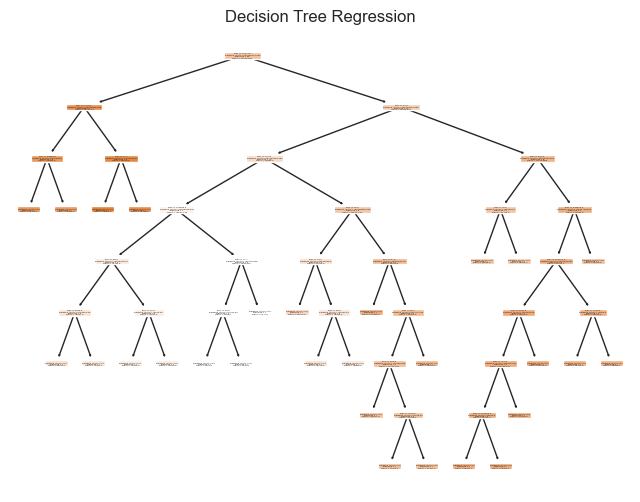

In [71]:
from sklearn.tree import plot_tree 
from sklearn import tree

# Visualize Decision Tree
plt.figure(figsize=(8, 6))
plot_tree(model, filled=True)
plt.title('Decision Tree Regression')
plt.show()

In [72]:
print(tree.export_text(model))

|--- feature_4 <= 77413.50
|   |--- feature_0 <= 1713.00
|   |   |--- feature_4 <= 59896.00
|   |   |   |--- value: [65423.00]
|   |   |--- feature_4 >  59896.00
|   |   |   |--- value: [62389.00]
|   |--- feature_0 >  1713.00
|   |   |--- feature_3 <= 11.70
|   |   |   |--- value: [76953.00]
|   |   |--- feature_3 >  11.70
|   |   |   |--- value: [70288.00]
|--- feature_4 >  77413.50
|   |--- feature_1 <= 77.00
|   |   |--- feature_3 <= 12.05
|   |   |   |--- feature_4 <= 124849.50
|   |   |   |   |--- feature_1 <= 68.50
|   |   |   |   |   |--- feature_0 <= 2048.50
|   |   |   |   |   |   |--- value: [20759.00]
|   |   |   |   |   |--- feature_0 >  2048.50
|   |   |   |   |   |   |--- value: [17824.00]
|   |   |   |   |--- feature_1 >  68.50
|   |   |   |   |   |--- feature_1 <= 72.00
|   |   |   |   |   |   |--- value: [12975.00]
|   |   |   |   |   |--- feature_1 >  72.00
|   |   |   |   |   |   |--- value: [13220.00]
|   |   |   |--- feature_4 >  124849.50
|   |   |   |   |--- fea

### Random Forest Regression Model

In [73]:
def train_evaluate_random_forest_model(X_train, X_test, y_train, y_test, target):
    # Train a Random Forest Regressor model
    rf = RandomForestRegressor(random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Target: {target}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')
  
    return rf
# Dictionary to store Random Forest models for each target
random_forest_models = {}

# Train and evaluate Random Forest models for each target crop
for target in targets:
    print(f'Training Random Forest model for {target} yield prediction:')
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    rf= train_evaluate_random_forest_model(X_train, X_test, y_train_target, y_test_target, target)
    random_forest_models[target] = rf

Training Random Forest model for aus yield prediction:
Target: aus
Mean Squared Error: 249754013.58417144
R^2 Score: 0.6549485870509992

Training Random Forest model for aman_capped yield prediction:
Target: aman_capped
Mean Squared Error: 2574279990.0776877
R^2 Score: 0.9566020627377323

Training Random Forest model for boro yield prediction:
Target: boro
Mean Squared Error: 6561082783.070803
R^2 Score: 0.9583290245165198

Training Random Forest model for wheat_capped yield prediction:
Target: wheat_capped
Mean Squared Error: 791925.9533035716
R^2 Score: 0.5697326982578088

Training Random Forest model for jute_capped yield prediction:
Target: jute_capped
Mean Squared Error: 840876226.2178303
R^2 Score: -0.07044837202846321

Training Random Forest model for potato yield prediction:
Target: potato
Mean Squared Error: 260531630.0424857
R^2 Score: 0.42467611326511



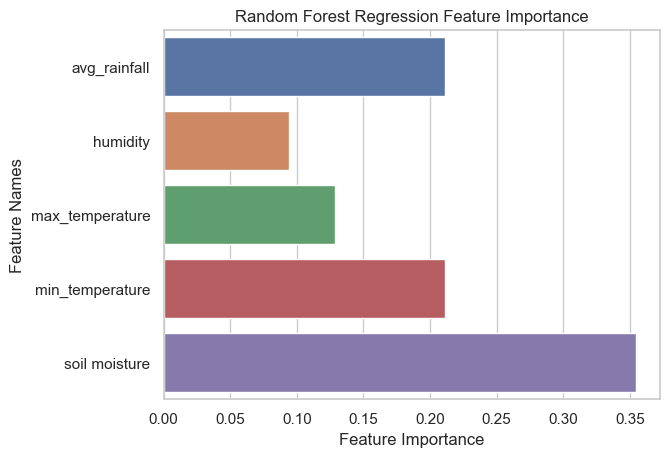

In [74]:
# Visualize the feature importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns  # Ensure these are the feature names from your data
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Regression Feature Importance')
plt.show()

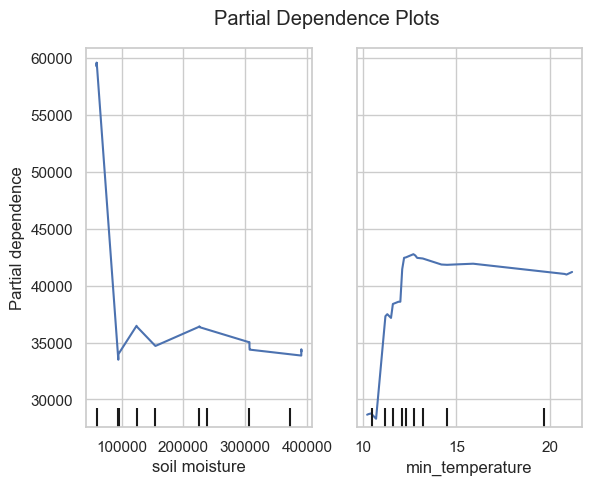

In [75]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Visualize the partial dependence plots for the top 2 features
top_features = feature_importances.argsort()[-2:][::-1]  # Indices of the top 2 features
feature_names = X_train.columns
top_feature_names = [feature_names[i] for i in top_features]

PartialDependenceDisplay.from_estimator(rf_model, X_train, features=top_features, feature_names=feature_names)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

### K-Nearest Neighbors (KNN) Regressor Model

In [76]:
def train_evaluate_knn_model(X_train, X_test, y_train, y_test, target):


    # Train a K-Nearest Neighbors (KNN) model
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Target: {target}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')
    
    return model
# Dictionary to store KNN models for each target
knn_models = {}

# Train and evaluate KNN models for each target crop
for target in targets:
    print(f'Training KNN model for {target} yield prediction:')
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    model = train_evaluate_knn_model(X_train, X_test, y_train_target, y_test_target, target)
    knn_models[target] = model

Training KNN model for aus yield prediction:
Target: aus
Mean Squared Error: 151543926.66857144
R^2 Score: 0.7906322093870674

Training KNN model for aman_capped yield prediction:
Target: aman_capped
Mean Squared Error: 7504674826.720001
R^2 Score: 0.873484077660921

Training KNN model for boro yield prediction:
Target: boro
Mean Squared Error: 8340350294.354283
R^2 Score: 0.9470284792722873

Training KNN model for wheat_capped yield prediction:
Target: wheat_capped
Mean Squared Error: 1153232.4914285718
R^2 Score: 0.37342850010348516

Training KNN model for jute_capped yield prediction:
Target: jute_capped
Mean Squared Error: 954582244.7742854
R^2 Score: -0.2151978829060186

Training KNN model for potato yield prediction:
Target: potato
Mean Squared Error: 99160122.18285714
R^2 Score: 0.7810277896236831



C:\Users\Nayeema Islam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


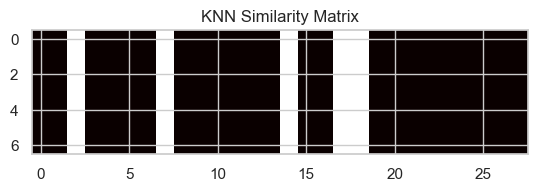

In [77]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Calculate similarity matrix
similarity_matrix = model.kneighbors_graph(X_test_scaled, n_neighbors=5)

# Convert sparse matrix to dense matrix
similarity_matrix_dense = similarity_matrix.toarray()

# Visualize similarity matrix as a heatmap
plt.imshow(similarity_matrix_dense, cmap='hot', interpolation='nearest')
plt.title('KNN Similarity Matrix')
plt.show()

## Models All together :::::::::

In [78]:
# Function for training and evaluating Linear Regression model
def train_evaluate_linear_model(X_train, X_test, y_train, y_test, target):
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    y_pred = lin_model.predict(X_test)
    lin_mse = mean_squared_error(y_test, y_pred)
    lin_r2 = r2_score(y_test, y_pred)
    return lin_model, lin_mse, lin_r2

# Function for training and evaluating Logistic Regression model
def train_evaluate_logistic_model(X_train, X_test, y_train, y_test, target):
    log_model = LogisticRegression(random_state=16)
    log_model.fit(X_train, y_train)
    y_pred = log_model.predict(X_test)
    log_accuracy = accuracy_score(y_test, y_pred)
    return log_model, log_accuracy

# Function for training and evaluating Decision Tree model (regression)
def train_evaluate_decision_tree_model(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeRegressor(random_state=1234)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    dt_mse = mean_squared_error(y_test, y_pred)
    dt_r2 = r2_score(y_test, y_pred)
    return dt_model, dt_mse, dt_r2

# Function for training and evaluating Random Forest model (regression)
def train_evaluate_random_forest_model(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    return rf_model, rf_mse, rf_r2

# Function for training and evaluating KNN model
def train_evaluate_knn_model(X_train, X_test, y_train, y_test, target):
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    knn_mse = mean_squared_error(y_test, y_pred)
    knn_r2 = r2_score(y_test, y_pred)
    return knn_model, knn_mse, knn_r2

In [40]:
# Dictionary to store evaluation metrics
evaluation_results = {
    'Target': [],
    'Model': [],
    'Metric': [],
    'Value': []
}

# Train and evaluate models for each target crop
for target in targets:
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    
    # Linear Regression
    lin_model, lin_mse, lin_r2 = train_evaluate_linear_model(X_train, X_test, y_train_target, y_test_target, target)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('Linear Regression')
    evaluation_results['Metric'].append('MSE')
    evaluation_results['Value'].append(lin_mse)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('Linear Regression')
    evaluation_results['Metric'].append('R2')
    evaluation_results['Value'].append(lin_r2)
    
#     # Logistic Regression (binary classification)
#     y_train_binary_target = y_train_binary[target]
#     y_test_binary_target = y_test_binary[target]
#     log_model, log_accuracy = train_evaluate_logistic_model(X_train, X_test, y_train_binary_target, y_test_binary_target, target)
#     evaluation_results['Target'].append(target)
#     evaluation_results['Model'].append('Logistic Regression')
#     evaluation_results['Metric'].append('Accuracy')
#     evaluation_results['Value'].append(accuracy)
    
    # Decision Tree Regression
    dt_model, dt_mse, dt_r2 = train_evaluate_decision_tree_model(X_train, X_test, y_train_target, y_test_target)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('Decision Tree Regression')
    evaluation_results['Metric'].append('MSE')
    evaluation_results['Value'].append(dt_mse)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('Decision Tree Regression')
    evaluation_results['Metric'].append('R2')
    evaluation_results['Value'].append(dt_r2)
    
    # Random Forest Regression
    rf_model, rf_mse, rf_r2 = train_evaluate_random_forest_model(X_train, X_test, y_train_target, y_test_target)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('Random Forest Regression')
    evaluation_results['Metric'].append('MSE')
    evaluation_results['Value'].append(rf_mse)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('Random Forest Regression')
    evaluation_results['Metric'].append('R2')
    evaluation_results['Value'].append(rf_r2)
    
        # KNN Regression
    knn_model, knn_mse, knn_r2 = train_evaluate_knn_model(X_train, X_test, y_train_target, y_test_target, target)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('K-Neighbors Regressor')
    evaluation_results['Metric'].append('MSE')
    evaluation_results['Value'].append(knn_mse)
    evaluation_results['Target'].append(target)
    evaluation_results['Model'].append('K-Neighbors Regressor')
    evaluation_results['Metric'].append('R2')
    evaluation_results['Value'].append(knn_r2)
    

In [79]:
# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)

# Display the summary table
print(evaluation_df)

          Target                     Model Metric         Value
0            aus         Linear Regression    MSE  1.929139e+08
1            aus         Linear Regression     R2  7.334769e-01
2            aus  Decision Tree Regression    MSE  2.598906e+07
3            aus  Decision Tree Regression     R2  9.640944e-01
4            aus  Random Forest Regression    MSE  2.497540e+08
5            aus  Random Forest Regression     R2  6.549486e-01
6            aus     K-Neighbors Regressor    MSE  1.515439e+08
7            aus     K-Neighbors Regressor     R2  7.906322e-01
8    aman_capped         Linear Regression    MSE  2.811603e+09
9    aman_capped         Linear Regression     R2  9.526012e-01
10   aman_capped  Decision Tree Regression    MSE  1.682216e+09
11   aman_capped  Decision Tree Regression     R2  9.716407e-01
12   aman_capped  Random Forest Regression    MSE  2.574280e+09
13   aman_capped  Random Forest Regression     R2  9.566021e-01
14   aman_capped     K-Neighbors Regress

# Select model

In [80]:
# Find the best models for each target crop based on R^2 score
best_models = []
for target in targets:
    best_row = evaluation_df[(evaluation_df['Target'] == target) & (evaluation_df['Metric'] == 'R2')].nlargest(1, 'Value')
    best_models.append(best_row)

# Create a DataFrame for the best models
best_models_df = pd.concat(best_models).reset_index(drop=True)

# Display the summary table of the best models
print(best_models_df)

# Optionally, save the summary table to a CSV file
best_models_df.to_csv('best_model_summary_r2.csv', index=False)

         Target                     Model Metric     Value
0           aus  Decision Tree Regression     R2  0.964094
1   aman_capped  Decision Tree Regression     R2  0.971641
2          boro  Decision Tree Regression     R2  0.980525
3  wheat_capped  Decision Tree Regression     R2  0.918301
4   jute_capped  Decision Tree Regression     R2  0.952123
5        potato     K-Neighbors Regressor     R2  0.781028
